# Import Packages

In [1]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['tumor', 'normal', ]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():

    datasets = ['C:/Users/MOHAM/Music/Batch_C11_Executed_Code/train', 'C:/Users/MOHAM/Music/Batch_C11_Executed_Code/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/MOHAM/Music/Batch_C11_Executed_Code/train


100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:04<00:00, 172.70it/s]


Loading C:/Users/MOHAM/Music/Batch_C11_Executed_Code/test


100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:04<00:00, 169.04it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1221
Number of testing examples: 1221
Each image is of size: (150, 150)


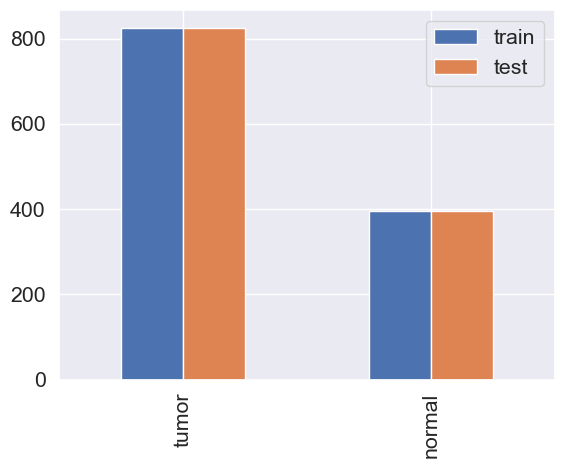

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

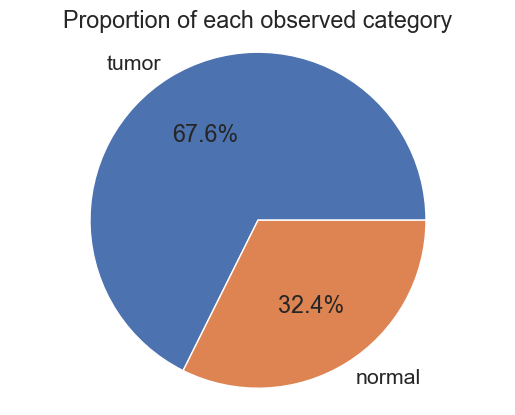

In [8]:
plt.pie(train_counts,
        explode=(0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [10]:
def display_random_image(class_names, images, labels):


    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

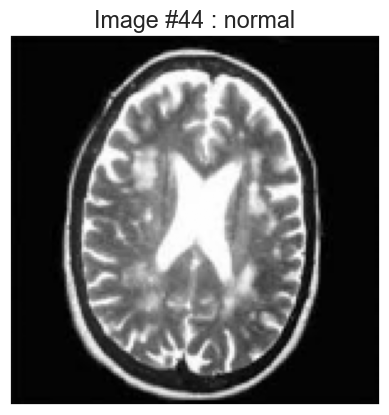

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

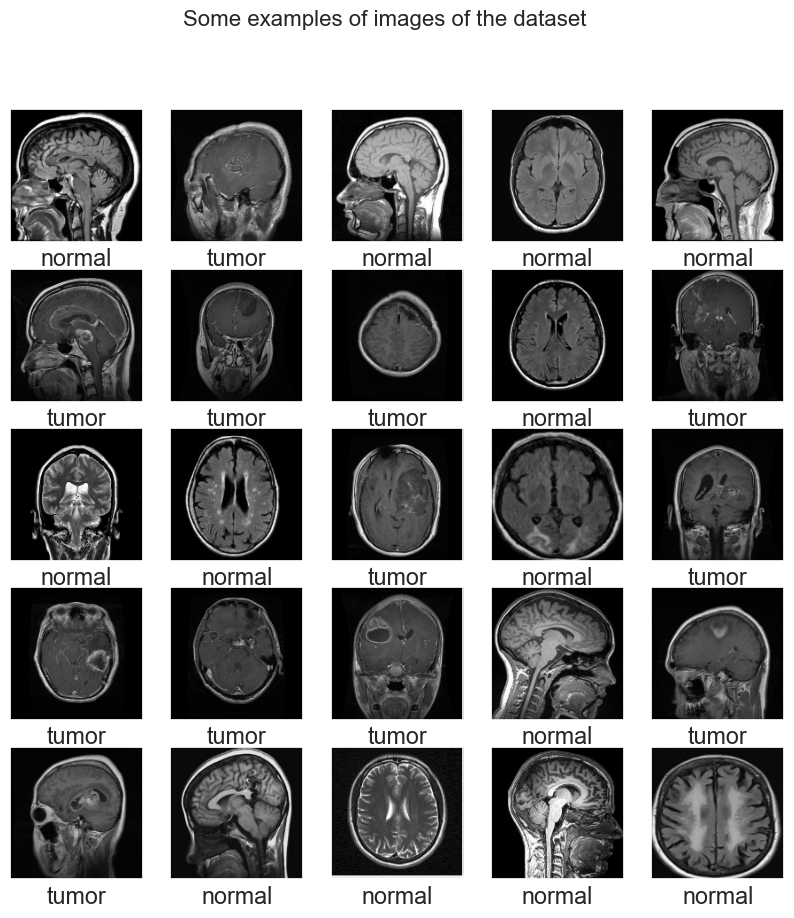

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

C:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=60, validation_split = 0.2)

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 675ms/step - accuracy: 0.4888 - loss: 0.8725 - val_accuracy: 0.8898 - val_loss: 0.3359
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 575ms/step - accuracy: 0.9078 - loss: 0.3029 - val_accuracy: 0.9388 - val_loss: 0.1795
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 609ms/step - accuracy: 0.9325 - loss: 0.1876 - val_accuracy: 0.9633 - val_loss: 0.1180
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 619ms/step - accuracy: 0.9764 - loss: 0.1055 - val_accuracy: 0.9551 - val_loss: 0.1213
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.9786 - loss: 0.0714 - val_accuracy: 0.9714 - val_loss: 0.0850
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.9940 - loss: 0.0296 - val_accuracy: 0.9633 - val_loss: 0.0654
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 637ms/step - accuracy: 0.9955 - loss: 0.0222 - val_accuracy: 0.9837 - val_loss: 0.0753
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 607ms/step - accuracy: 0.9964 - loss: 0.0166 - val_accuracy: 0.9755 - val_loss:

In [17]:
test_loss = model.evaluate(test_images, test_labels)

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9933 - loss: 0.0619


In [18]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

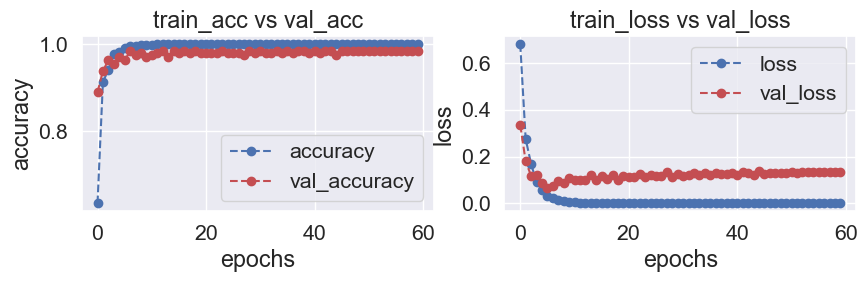

In [19]:
plot_accuracy_loss(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
[1]


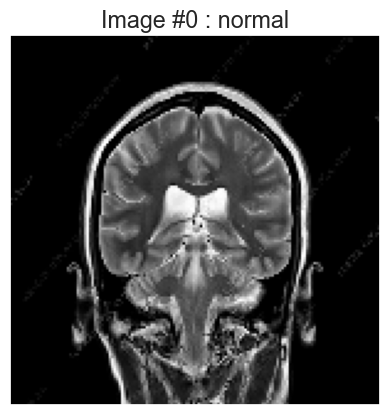

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/MOHAM/Music/Batch_C11_Executed_Code/test/normal/image (9).jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )

index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


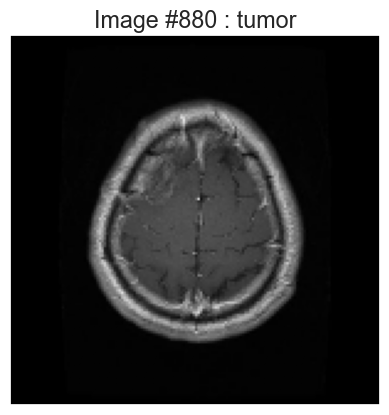

In [21]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [22]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [23]:
def display_examples(class_names, images, labels):
    num_examples = min(len(images), len(labels))  # Ensure to iterate over the minimum length of images or labels
    for i in range(num_examples):
        plt.figure(figsize=(10,10))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


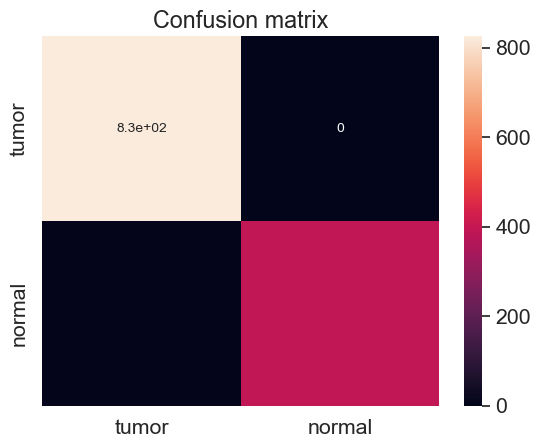

In [24]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_true contains true labels and y_pred contains predicted labels
y_true = [0, 1, 0, 1]
y_pred = [0, 1, 1, 1]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)


Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


In [26]:
from sklearn.metrics import classification_report
print("\n Classification report : \n {}".format(classification_report(test_labels, pred_labels)))


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      0.99      0.99       395

    accuracy                           1.00      1221
   macro avg       1.00      0.99      1.00      1221
weighted avg       1.00      1.00      1.00      1221



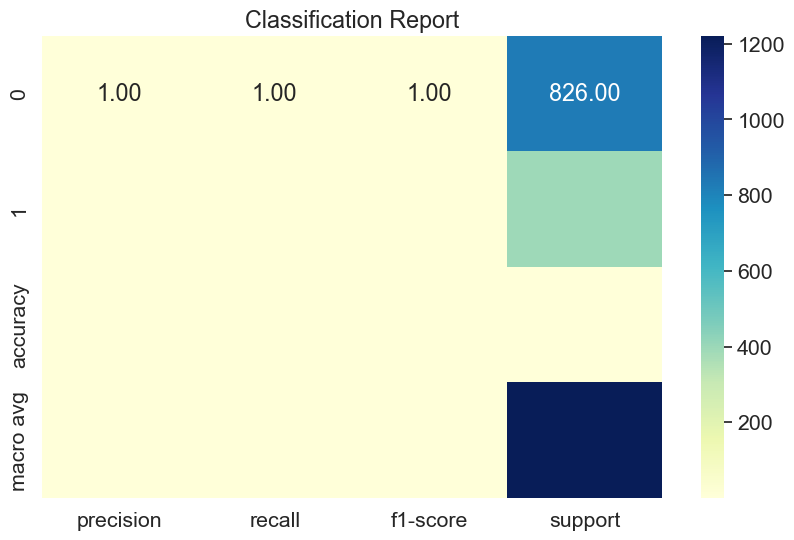

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()


In [28]:
model.save_weights("model_vgg.weights.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
model_json=model.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_vgg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.weights.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = [ 'tumor','normal' ] 
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [16/Apr/2024 10:54:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Apr/2024 10:54:43] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [16/Apr/2024 10:54:46] "GET /favicon.ico HTTP/1.1" 404 -


uploads\gg (15).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


127.0.0.1 - - [16/Apr/2024 10:55:44] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [16/Apr/2024 10:55:44] "GET /classify/gg%20(15).jpg HTTP/1.1" 200 -
127.0.0.1 - - [16/Apr/2024 10:55:44] "GET /static/script.js HTTP/1.1" 304 -


[1.0000000e+00 5.5876181e-10 6.7921688e-25 3.2180099e-21]
